In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision

In [2]:
def target_function(x):
    return x**3 - 12*x**2 +44*x -18 + np.random.randn(len(x))


def output_function(x):
    return x


def sigmoid(x):
    sigmoid_range = 34.

    if x <= -sigmoid_range:
        return 1e-15
    if x >= sigmoid_range:
        return 1.0 - 1e-15

    return 1.0 / (1.0 + np.exp(-x))

def mean_square_error(y, y_pred):
    return ((1/2)*np.square(y_pred - y))/len(y)

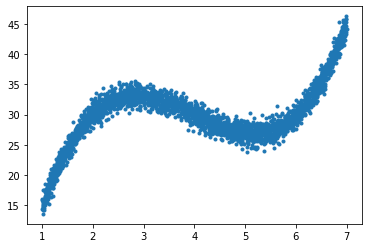

In [3]:
data_size = 3000
x =  6*np.random.rand(data_size)+1
y = target_function(x)
plt.scatter(x, y, marker='.')

In [1]:
class RegressionMLP():
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        lr = 0.01
        w1 = 2 * np.random.randn(input_layer_size, hidden_layer_size)
        b1 = 2 * np.random.randn(hidden_layer_size)
        w2 = 2 * np.random.randn(hidden_layer_size, output_layer_size)
        b2 = 2 * np.random.randn(output_layer_size)

    def forward(self, x):
        u1 = np.dot(x, self.w1) + self.b1
        z1 = sigmoid(u)
        u2 = np.dot(z1, self.w2) + self.b2
        y_pred = sigmoid(u2)
        return y_pred
    
    def backward(self, x, y, y_pred):
        n = x.shape[0]
        dy = (y_pred - y)/n
        w2_grad = np.dot(self.z1.T, dy)
        b2_grad = dy.sum()
        dz1 = np.dot(dy, self.w2.T)